In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import glob

# get dataset music

In [2]:
def get_notes():
        
    file = open('notes/baroque_notes.pickle', 'rb')
    notes = pickle.load(file)
    file.close()
    
    return notes

In [3]:
notes = get_notes()
notes.shape

(431, 1000, 84)

# get generated music

In [4]:
from pypianoroll import Multitrack, Track

In [5]:
##################################################### mid2arr()

def mid2arr(file):
    
    final_piece = []
    
    # first track
    first_track = []
    for row in file.tracks[0].pianoroll[:1000]:
        tmp_row = []
        for i in row:
            # normalize the training data between -1 and 1
            if i==0:
                tmp_row.append(-1)
            else:
                tmp_row.append(1)
        first_track.append(tmp_row)
    
    first_track = np.array(first_track)
    if first_track.shape != (1000,128):
        print('*********************************************************************')
        print(first_track.shape)
    
    first_track = first_track[:,24:108]
    
    fig = plt.figure()
    fig.set_size_inches(18,10)
    plt.imshow(first_track.T, aspect='auto', cmap='gray')
    plt.gca().invert_yaxis()
    plt.show()
    
    return first_track

C:\Users\chiatsekuo\miniconda3\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


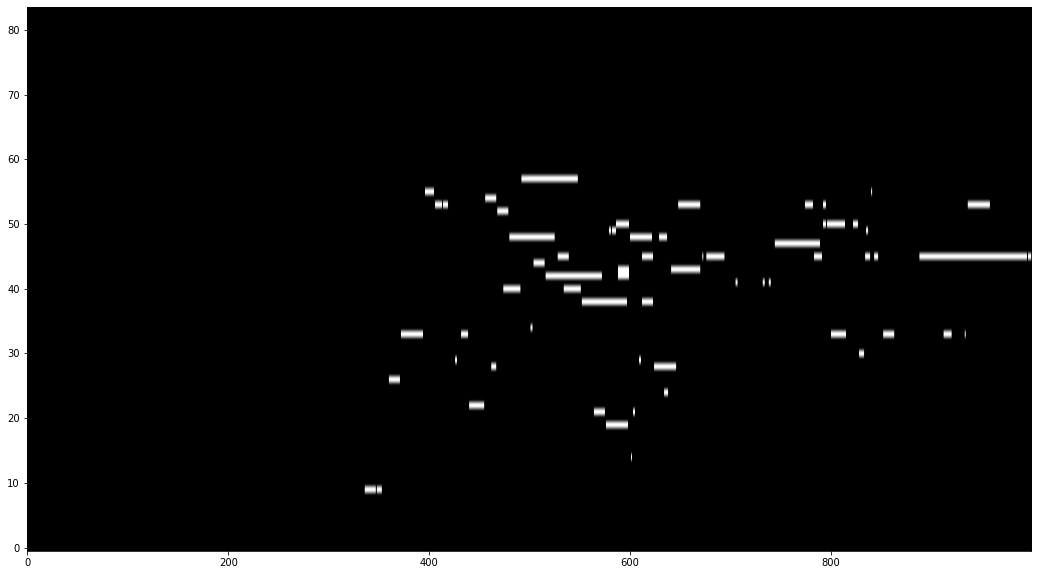

In [6]:
infile = Multitrack('./generated_instances/baroque.mid')

instance = mid2arr(infile)

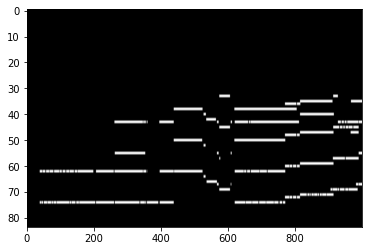

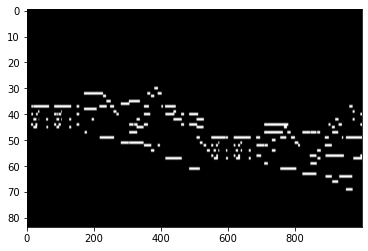

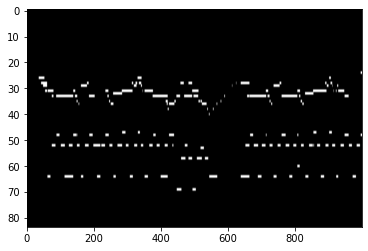

In [7]:
for i in range(3):
    firstPiece = notes[i]
    img2 = np.fliplr(firstPiece)
    plt.imshow(img2.T, cmap='gray', aspect='auto')
    
    plt.show()

In [8]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [9]:
rmse_arr = []

for i in range(notes.shape[0]):
    tmp = rmse(instance, notes[i])
    rmse_arr.append([tmp, i, notes[i]])

rmse_arr.sort()
print('rmse err:', rmse_arr[0][0])

rmse err: 0.227198256197198


# Show the instance image

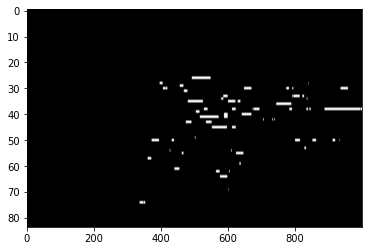

In [10]:
instance_img = np.fliplr(instance)
plt.imshow(instance_img.T, cmap='gray', aspect='auto')
plt.show()

# Get the closest neighbor

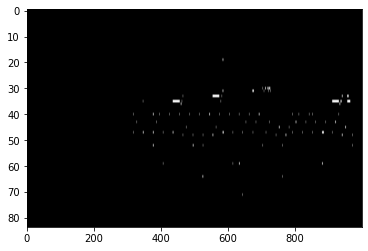

In [11]:
closest = rmse_arr[0][2]
closest_img = np.fliplr(closest)
plt.imshow(closest_img.T, cmap='gray', aspect='auto')
plt.show()